In [57]:
with open('events.txt', 'r', encoding='utf-8') as file:
    data = list()
    # ts, x, y, polarity
    for line in file:
        line = line.strip().split(" ")
        if float(line[0]) < 1:
            data.append(line)

In [58]:
import numpy as np

n_events = len(data)

timestamp = np.empty(n_events, dtype=float)
x = np.empty(n_events, dtype=int)
y = np.empty(n_events, dtype=int)
polarity = np.empty(n_events, dtype=int)

for i, event in enumerate(data):
    timestamp[i] = event[0]
    x[i] = event[1]
    y[i] = event[2]
    polarity[i] = event[3]

In [59]:
print(n_events)
print(timestamp[0], timestamp[-1])
print(np.max(x), np.min(x))  # image res: 240x180
print(np.max(y), np.min(y))
print(np.count_nonzero(polarity == 1))  # num of positive events
print(np.count_nonzero(polarity == 0))  # num of negative events


72045
0.0 0.999996
239 4
179 1
31036
41009


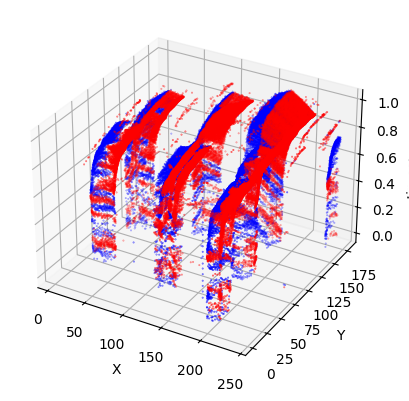

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_pos, y_pos, ts_pos = x[polarity==1], y[polarity==1], timestamp[polarity==1]
x_neg, y_neg, ts_neg = x[polarity==0], y[polarity==0], timestamp[polarity==0]

ax.scatter(x_pos, y_pos, ts_pos, c='blue', marker='o', s=0.15)
ax.scatter(x_neg, y_neg, ts_neg, c='red', marker='o', s=0.15)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('timestamp')

plt.show()

Text(0.5, 0, 'timestamp')

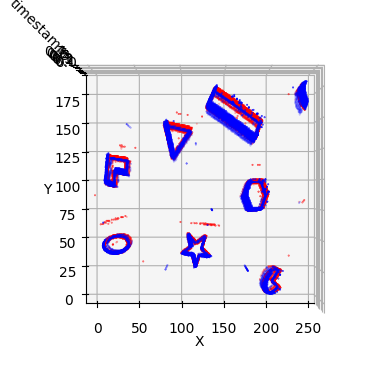

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

max_events = 8000

ax.scatter(x_pos[:max_events], y_pos[:max_events], ts_pos[:max_events], c='blue', marker='o', s=0.15)
ax.scatter(x_neg[:max_events], y_neg[:max_events], ts_neg[:max_events], c='red', marker='o', s=0.15)

ax.view_init(elev=90, azim=-90)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('timestamp')

In [62]:
# How long is the sequence used during exercise 1.1 (in seconds)
print(timestamp[-1] - timestamp[0]) 
# What’s the resolution of event timestamps
print(timestamp[1] - timestamp[0])
# What does the time difference between consecutive events depend on
# Od czasu, w którym pojawi się zmaina jasności w polu widzenia kamery
# What does positive/negative event polarity mean
# Czy jasność zmieniła się z jąśniejszą na ciemniejszą czy na odwrót
# What is the direction of movement of objects in exercise 1.2
# Na powyższym wykresie - w prawo w górę

0.999996
1.1001e-05


# Ćw 2

In [63]:
import cv2

with open('events.txt', 'r', encoding='utf-8') as file:
    data = list()
    # ts, y, x, polarity
    for line in file:
        line = line.strip().split(" ")
        if float(line[0]) > 1 and float(line[0]) < 2:
            data.append(line)

In [81]:
n_events = len(data)

timestamp = np.empty(n_events, dtype=float)
x = np.empty(n_events, dtype=int)
y = np.empty(n_events, dtype=int)
polarity = np.empty(n_events, dtype=int)

for i, event in enumerate(data):
    timestamp[i] = event[0]
    x[i] = event[1]
    y[i] = event[2]
    
    polarity[i] = 1 if int(event[3]) == 1 else -1

In [86]:
def event_frame(events_x, events_y, polarity, img_shape):
    frame = (np.zeros(img_shape) + 127).astype(np.uint8)
    for i, (x, y) in enumerate(zip(events_x, events_y)):
        frame[y,x] = 255 if polarity[i] == 1 else 0
        
    return frame

TAU = 0.01
IMG_SHAPE = (180, 240)

temp_x = list()
temp_y = list()
temp_pol = list()
temp_ts = list()

for ts, e_x, e_y, pol in zip(timestamp, x, y, polarity):
    temp_x.append(e_x)
    temp_y.append(e_y)
    temp_pol.append(pol)
    temp_ts.append(ts)
    
    if temp_ts[-1] - temp_ts[0] > TAU:
        frame = event_frame(temp_x, temp_y, temp_pol, IMG_SHAPE)
               
        temp_x = list()
        temp_y = list()
        temp_pol = list()
        temp_ts = list()
        
        cv2.imshow("events", frame)
        if cv2.waitKey(0) & 0xFF == ord("q"):  # break the loop when the ’q’ key is pressed
            break

cv2.destroyAllWindows()